In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

/home/nakatsuka/anaconda3/envs/tf16/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
input_ = tf.placeholder(tf.float32, shape=[None, 224, 224, 3])

In [3]:
sess = tf.keras.backend.get_session()

In [4]:
tf.keras.backend.set_learning_phase(0)
graph = tf.keras.backend.get_session().graph
model = tf.keras.applications.ResNet50(weights='imagenet', input_tensor=input_)
y = model.output
y_ = tf.argmax(y, axis=-1)
model.trainable = False
logits = graph.get_operation_by_name('fc1000/BiasAdd').outputs[0]

In [39]:
index = tf.placeholder(tf.int32, [])
w = graph.get_tensor_by_name('fc1000/kernel:0')[:, index]
for i in range(3):
    w = tf.expand_dims(w, axis=0)
fm = model.get_layer('add_%d' %15).output
l = tf.nn.relu(tf.reduce_sum(w*fm, axis=-1))

In [40]:
image = tf.keras.preprocessing.image.load_img('2007_001763.jpg', target_size=(224, 224))
x = np.asarray(image, dtype='float32')
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

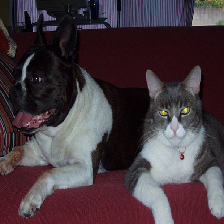

In [41]:
image

In [42]:
tf.keras.applications.resnet50.decode_predictions(sess.run(y,
                                                           feed_dict={input_: x}))

[[('n02108915', 'French_bulldog', 0.16482137),
  ('n02096585', 'Boston_bull', 0.097020715),
  ('n02123159', 'tiger_cat', 0.07688853),
  ('n02123597', 'Siamese_cat', 0.07138961),
  ('n02124075', 'Egyptian_cat', 0.06003372)]]

In [43]:
i = 245
sal = sess.run(l, feed_dict={input_: x,
                             index: i})

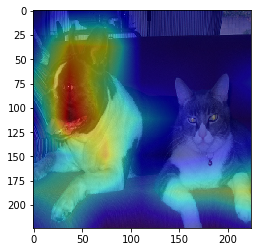

In [44]:
plt.imshow(image)
plt.imshow(scipy.ndimage.zoom(sal[0], (32, 32), order=1), alpha=0.5, cmap='jet')

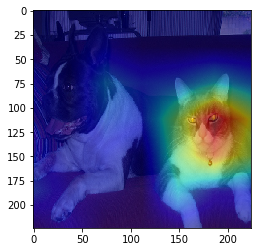

In [45]:
i = 282
sal = sess.run(l, feed_dict={input_: x,
                             index: i})
plt.imshow(image)
plt.imshow(scipy.ndimage.zoom(sal[0], (32, 32), order=1), alpha=0.5, cmap='jet')